In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The CSV File using Pandas

In [3]:
data = pd.read_csv('/content/Customer Churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we see that data type of total charges is object. Lets convert into float

In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(' ' , '0')
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data.shape

(7043, 21)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
data.isnull().sum().sum()

0

In [22]:
data['customerID'].duplicated().sum()

0

Convert data in senior citizen column. 0 = no , 1 = yes

In [23]:
def conv(value):
  if value == 0 :
    return "NO"
  else:
    return "Yes"

data['SeniorCitizen'] = data['SeniorCitizen'].apply(conv)

In [24]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


# EDA Start


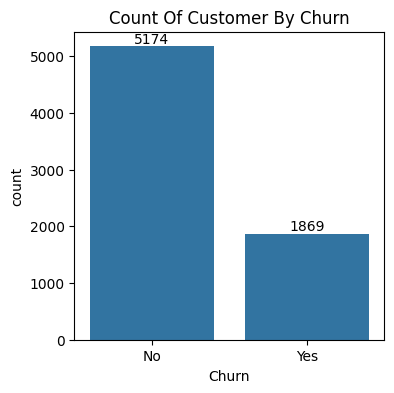

In [41]:
plt.figure(figsize=(4 , 4))
plt.title("Count Of Customer By Churn")
ax = sns.countplot( x = 'Churn' , data = data)
ax.bar_label(ax.containers[0])
plt.show()

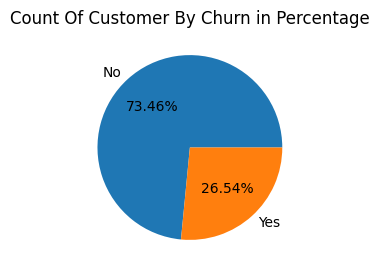

In [42]:
plt.figure(figsize=(3,3))
gb = data.groupby('Churn').agg({'Churn' : "count"})
gb
plt.pie(gb['Churn'] , labels = gb.index , autopct= "%1.2f%%")

plt.title("Count Of Customer By Churn in Percentage")
plt.show()

From the given chart we can conclude 26.54% customers have churn out.

# Let's Find The Reason

In [43]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


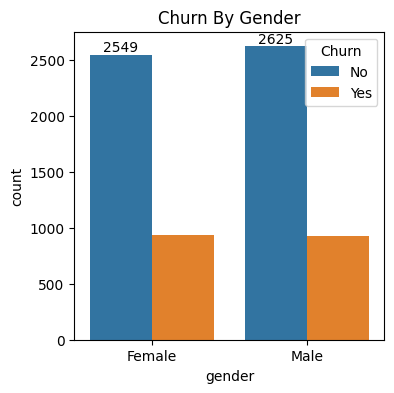

In [53]:
plt.figure(figsize= (4,4))
plt.title("Churn By Gender")
ax = sns.countplot(x = "gender" , data = data , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.show()

Primarily, we can say that Churning is not depends on Gender

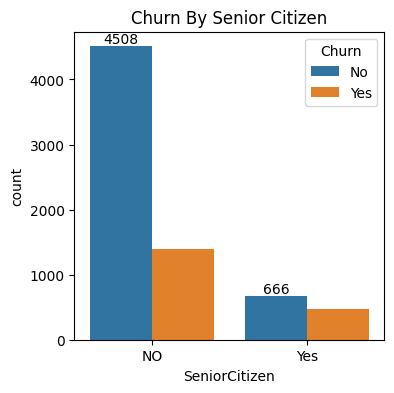

In [58]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= "SeniorCitizen" , data = data , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn By Senior Citizen")
plt.show()

<Figure size 400x400 with 0 Axes>

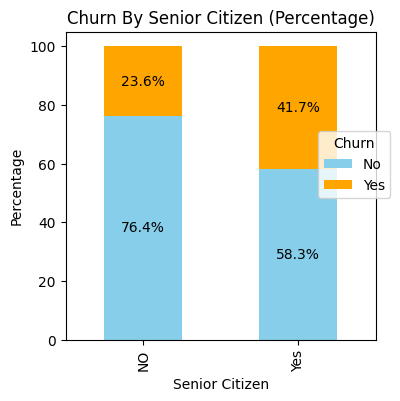

In [75]:

plt.figure(figsize=(4,4))
# Create a crosstab to get the counts
crosstab = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index') * 100

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(4, 4), color=['skyblue', 'orange'])

# Adding labels and title
plt.title("Churn By Senior Citizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")

# Add percentage labels on each bar
for n, x in enumerate([0, 1]):
    for (i, pct) in enumerate(crosstab.values[:, n]):
        plt.text(i, crosstab.values[:i+1, :n+1].sum(axis=1)[i] - pct/2, f'{pct:.1f}%',
                 ha='center', va='center', color='black')

# Display the plot
plt.legend(title='Churn', bbox_to_anchor=(1.07, 0.7) , loc='upper right')
plt.show()


From the above analysis we can conclude that 41.7% senior citizen are churned out. It's much higher that who are under senior citizen.

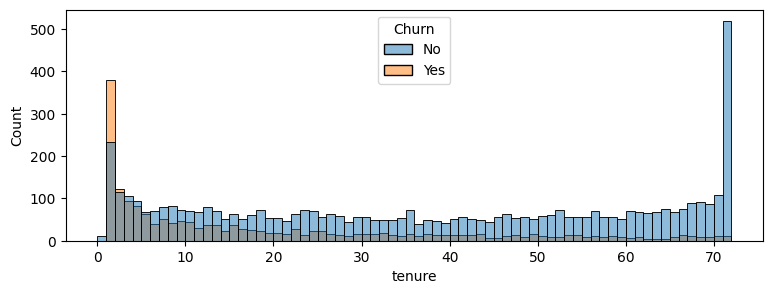

In [82]:
plt.figure(figsize= (9, 3))
sns.histplot(x = 'tenure' ,  data = data , bins=72 , hue = 'Churn' )
plt.show()

People who have uses our services long period have stayed and who have uses 1 or 2 months have churned out

In [87]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

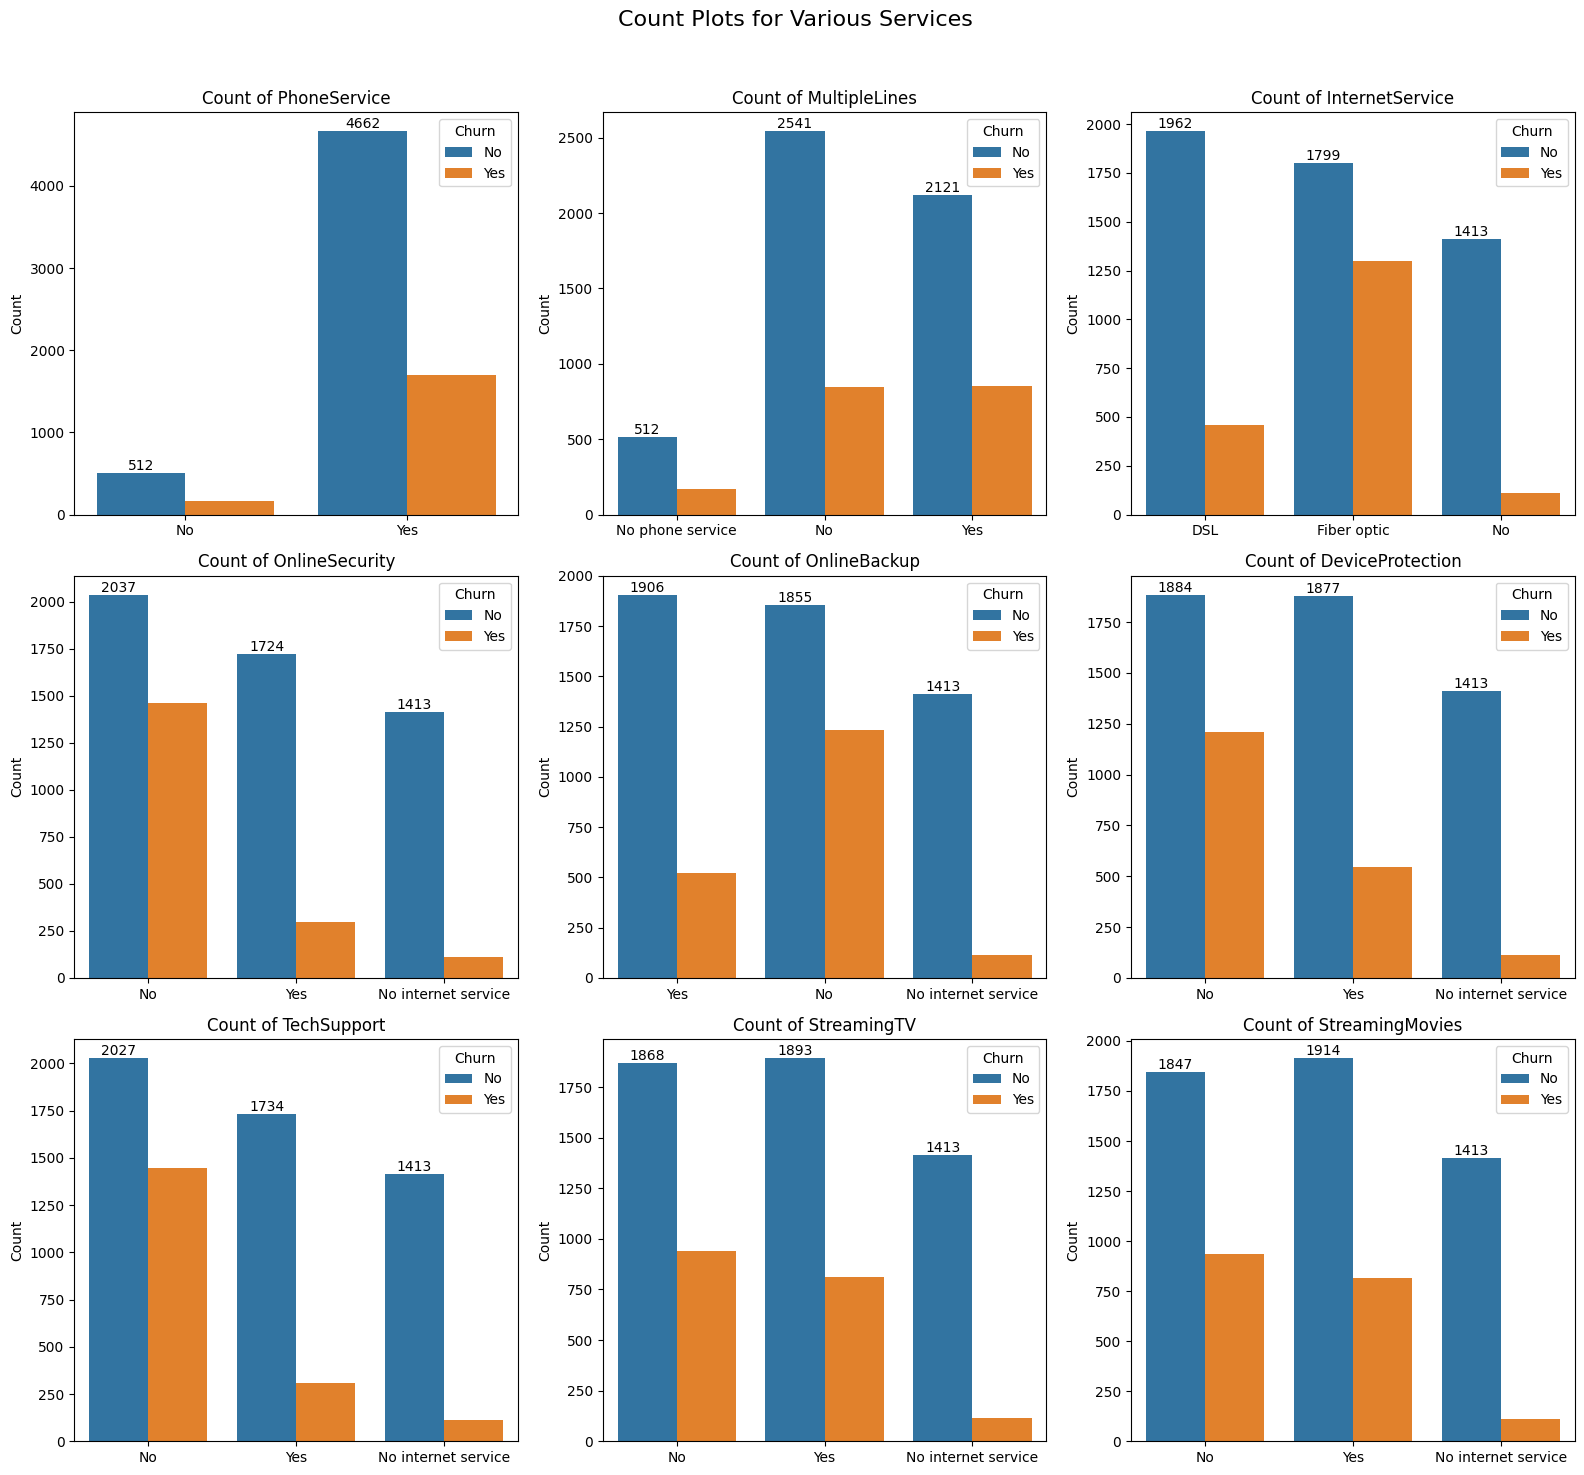

In [96]:


# List of columns you want to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
fig.suptitle('Count Plots for Various Services', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(columns):
    ax = sns.countplot(x=col, data=data, ax=axes[i]  , hue="Churn")
    ax.bar_label(ax.containers[0])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')  # Remove x labels to save space
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


From the above subplot we can conclude that customer are largely churned out who are using Fiber optics Internet services and who have multiple lines . We need to improve these section.

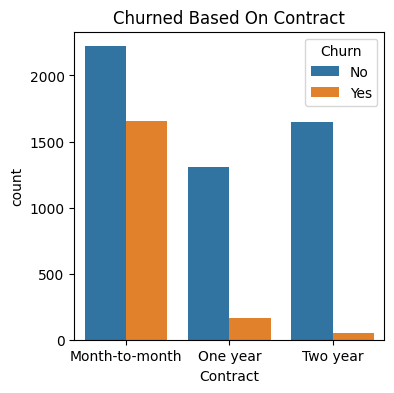

In [99]:
plt.figure(figsize= (4, 4))
sns.countplot( x = 'Contract' , data = data , hue = 'Churn')
plt.title("Churned Based On Contract")
plt.show()

Customers are primarily churned out mainly , who use Month to Month Contract compare to 1 or 2 year contract

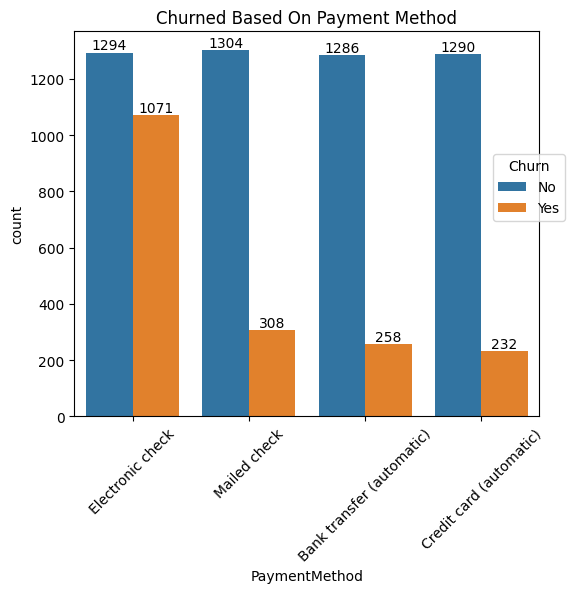

In [107]:
plt.figure(figsize= (6, 5))
ax = sns.countplot( x = 'PaymentMethod' , data = data , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Based On Payment Method")
plt.xticks(rotation = 45)
plt.legend(title='Churn', bbox_to_anchor=(1.07, 0.7) , loc='upper right')
plt.show()

Customer is likely to churn who are using Electric check compare to any automatic payment method